In [1]:
import sys
from src import model, visualization, evaluate, data
import src.lib.useful_functions as uf


import numpy as np
import yaml
import os
import cv2 as cv
import csv
import pandas as pd

In [7]:
#Muy lento, buscar forma de optimizar
#Demora 35 seg para 100 imagenes, para 51219 se espera 5 hs aprox

#Load first img from folder

fr_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020'
img1_filename = sorted(os.listdir(fr_folder_path))[0]
img1 = load_img(last_img_name=img1_filename)


#Iterate from second img to last./,;'[//,/pl
fieldnames = ['Img1', 'Img2', 'rmse']

with open(   'outliers2.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for filename in sorted(os.listdir(fr_folder_path))[1:]:
        img2_filename = filename
        img2 = load_img(last_img_name=img2_filename)
        rmse = np.sqrt(np.mean((img1 - img2)**2))
        
        row_dict = {}
        row_dict['Img1'] = img1_filename
        row_dict['Img2'] = img2_filename
        row_dict['rmse'] = rmse

        writer.writerow(row_dict)
        
        img1 = img2
        img1_filename = img2_filename
    

In [3]:
data = pd.read_csv("outliers.csv") 

82.01935


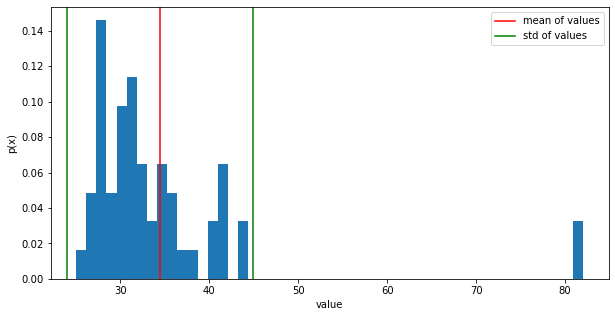

In [4]:
rmse = data.rmse.to_list()
rmse_cut = [n for n in rmse if (n >= 25)]
print(np.max(rmse))
visualization.plot_histogram(rmse,bins=50)



In [10]:
print(len(data))
for i in range(len(data)):
    if (data.values[i][2])>20:
        print(data.values[i])

51218
['ART_2020001_084021.FR' 'ART_2020001_085021.FR' 20.501123]
['ART_2020001_085021.FR' 'ART_2020001_090021.FR' 20.549362]
['ART_2020001_090021.FR' 'ART_2020001_091021.FR' 21.616316]
['ART_2020001_091021.FR' 'ART_2020001_092021.FR' 20.029688]
['ART_2020002_090021.FR' 'ART_2020002_091021.FR' 20.407064000000002]
['ART_2020006_090021.FR' 'ART_2020006_091021.FR' 21.40292]
['ART_2020006_091021.FR' 'ART_2020006_092021.FR' 21.00891]
['ART_2020006_092021.FR' 'ART_2020006_093021.FR' 20.249264]
['ART_2020006_213020.FR' 'ART_2020007_001020.FR' 30.753529999999998]
['ART_2020009_151021.FR' 'ART_2020009_155021.FR' 82.01935]
['ART_2020009_155021.FR' 'ART_2020009_160021.FR' 81.82304]
['ART_2020010_173021.FR' 'ART_2020011_103021.FR' 32.588703]
['ART_2020012_083020.FR' 'ART_2020012_092020.FR' 28.210955]
['ART_2020012_094020.FR' 'ART_2020012_174020.FR' 32.90268]
['ART_2020016_090019.FR' 'ART_2020016_091019.FR' 20.324661]
['ART_2020017_090019.FR' 'ART_2020017_091019.FR' 21.244217000000003]
['ART_202001